# Student Name: Qadeer Hussain 
# Topic: MultiNomial Bayessian Classifiers
# Lecturer: Greg Doyle

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from matplotlib import pyplot as plt

In [2]:
# Define the column names
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Load the data
data = pd.read_csv('adult/adult.data', names=column_names)

In [3]:
print(data.head())
print(data.info())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [4]:
print(data['income'].value_counts())

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [5]:
# Checking for any missing values
missing_values = data.isnull().sum()
print(missing_values)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [6]:
# Strip any whitespace characters
data['income'] = data['income'].str.strip().map({'>50K': 1, '<=50K': 0})

In [7]:
# Create binary indicator for any positive capital gains and capital losses
data['has_capital_gain'] = (data['capital-gain'] > 0).astype(int)
data['has_capital_loss'] = (data['capital-loss'] > 0).astype(int)

In [8]:
# Log transform capital gains, zero if no gain.
data['log_capital_gain'] = np.where(data['capital-gain'] > 0, np.log(data['capital-gain']), 0)
# Log transform captial losses, zero if no loss
data['log_capital_loss'] = np.where(data['capital-loss'] > 0, np.log(data['capital-loss']), 0)

C:\Users\qadee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\qadee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

In [10]:
# Display the first few rows of the new dataframe to verify the encoding
print(data_encoded.head())

   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income  has_capital_gain  has_capital_loss  log_capital_gain  ...  \
0       0                 1                 0          7.684324  ...   
1       0                 0                 0          0.000000  ...   
2       0                 0                 0          0.000000  ...   
3       0                 0                 0          0.000000  ...   
4       0                 0                 0          0.000000  ...   

   native-country_ Portugal  native-country_ Puerto-Rico  \
0                     False                 

In [11]:
X = data_encoded.drop('income', axis=1)

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Target Variable Income
y = data['income']

# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [12]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
# Classification Report
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

class_report = classification_report(y_test, y_pred, target_names=['Rejected', 'Approved'])
print(class_report)

Accuracy: 0.8204524516327157
Precision: 0.5985915492957746
Recall: 0.7346585998271391
F1-Score: 0.6596818005432674
              precision    recall  f1-score   support

    Rejected       0.91      0.85      0.88      7455
    Approved       0.60      0.73      0.66      2314

    accuracy                           0.82      9769
   macro avg       0.75      0.79      0.77      9769
weighted avg       0.84      0.82      0.83      9769



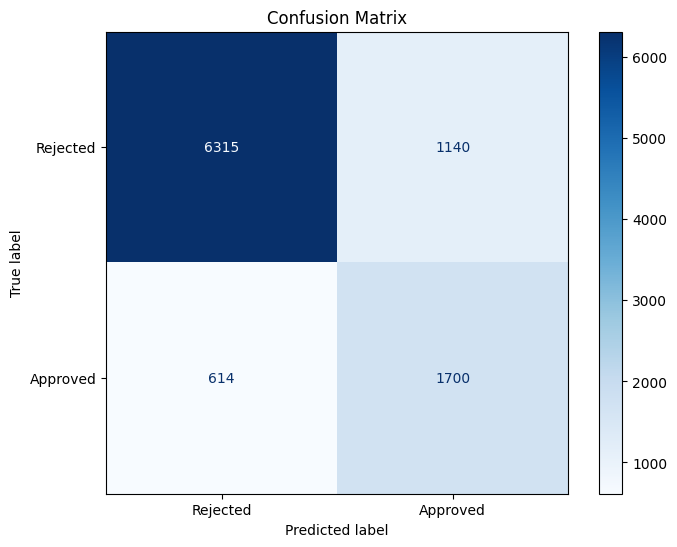

In [14]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected', 'Approved'])
cm_display.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()